In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
user_details = pd.read_excel('Assignment.xlsx', sheet_name=0)
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [6]:
cooking_sessions = pd.read_excel('Assignment.xlsx', sheet_name=1)
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [7]:
order_details = pd.read_excel('Assignment.xlsx', sheet_name=2)
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [12]:
missing_values = order_details.isnull().sum()
missing_values

,0
Order ID,0
User ID,0
Order Date,0
Meal Type,0
Dish Name,0
Order Status,0
Amount (USD),0
Time of Day,0
Rating,2
Session ID,0


In [13]:
order_details['Rating'].fillna(order_details['Rating'].mode()[0], inplace=True)
missing_values = order_details.isnull().sum()
missing_values

<ipython-input-13-032dfc52de40>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_details['Rating'].fillna(order_details['Rating'].mode()[0], inplace=True)


,0
Order ID,0
User ID,0
Order Date,0
Meal Type,0
Dish Name,0
Order Status,0
Amount (USD),0
Time of Day,0
Rating,0
Session ID,0


In [17]:
merged_df = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
merged_df = pd.merge(merged_df, order_details, on='User ID', how='inner')
merged_df.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


In [22]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            38 non-null     object        
 1   User Name          38 non-null     object        
 2   Age                38 non-null     int64         
 3   Location           38 non-null     object        
 4   Registration Date  38 non-null     datetime64[ns]
 5   Phone              38 non-null     object        
 6   Email              38 non-null     object        
 7   Favorite Meal      38 non-null     object        
 8   Total Orders       38 non-null     int64         
 9   Session ID_x       38 non-null     object        
 10  Dish Name_x        38 non-null     object        
 11  Meal Type_x        38 non-null     object        
 12  Session Start      38 non-null     datetime64[ns]
 13  Session End        38 non-null     datetime64[ns]
 14  Duration (mi

,Age,Registration Date,Total Orders,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Amount (USD),Rating
count,38.000000,38,38.000000,38,38,38.000000,38.000000,38.000000,38,38.000000,38.000000
mean,33.342105,2023-03-12 23:22:06.315789568,10.973684,2024-12-04 13:09:28.421052672,2024-12-04 13:38:48.947368448,29.342105,4.481579,1007.394737,2024-12-03 22:44:12.631578880,11.052632,4.210526
min,25.000000,2023-01-15 00:00:00,5.000000,2024-12-01 12:00:00,2024-12-01 12:20:00,10.000000,4.000000,1001.000000,2024-12-01 00:00:00,7.000000,4.000000
25%,28.000000,2023-02-20 00:00:00,8.000000,2024-12-02 19:30:00,2024-12-02 20:10:00,20.000000,4.300000,1004.000000,2024-12-02 00:00:00,9.000000,4.000000
50%,33.000000,2023-03-10 00:00:00,11.000000,2024-12-04 13:30:00,2024-12-04 13:50:00,30.000000,4.500000,1007.500000,2024-12-04 00:00:00,11.000000,4.000000
75%,37.250000,2023-04-05 00:00:00,13.500000,2024-12-06 04:45:00,2024-12-06 05:17:30,40.000000,4.700000,1010.750000,2024-12-05 18:00:00,12.875000,4.000000
max,42.000000,2023-08-11 00:00:00,15.000000,2024-12-08 19:30:00,2024-12-08 20:10:00,45.000000,5.000000,1016.000000,2024-12-08 00:00:00,15.000000,5.000000
std,5.832233,NaN,2.917671,NaN,NaN,10.277965,0.284610,4.252436,NaN,2.479073,0.413155


<ipython-input-62-67f1c0e46f8c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=merged_df, x='Duration (mins)', y='Session Rating', palette='coolwarm')


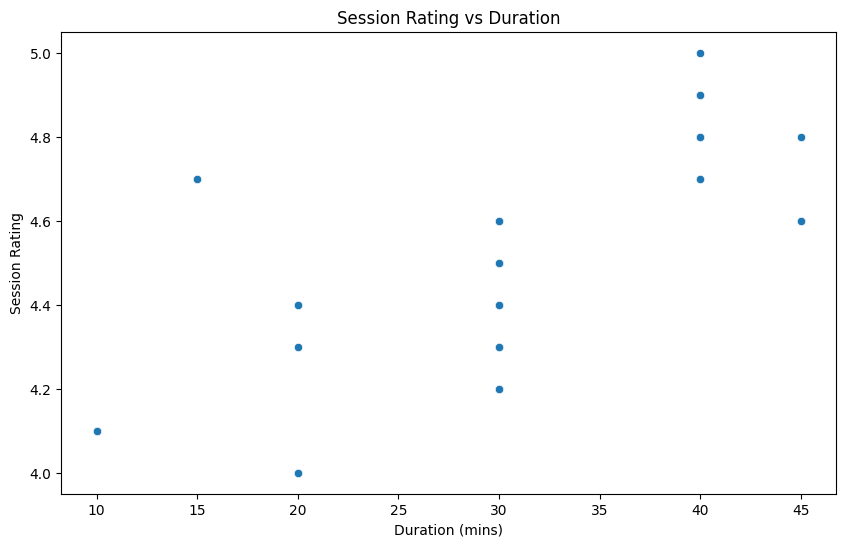

In [62]:
# Scatter plot for Session Rating vs Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Duration (mins)', y='Session Rating', palette='coolwarm')
plt.title('Session Rating vs Duration')
plt.xlabel('Duration (mins)')
plt.ylabel('Session Rating')
plt.show()


In [28]:
# Identify popular dishes
popular_dishes = merged_df.groupby('Dish Name_y')['Order ID'].count().sort_values(ascending=False)
print('\nMost Popular Dishes:')
print(popular_dishes.head(10))


Most Popular Dishes:
Dish Name_y
Grilled Chicken    9
Spaghetti          9
Caesar Salad       7
Pancakes           6
Veggie Burger      4
Oatmeal            3
Name: Order ID, dtype: int64


In [40]:
# Identify popular dishes based on meal type
popular_dishes_by_meal = merged_df.groupby(['Meal Type_y', 'Dish Name_y'])['Order ID'].count().reset_index()
popular_dishes_by_meal = popular_dishes_by_meal.sort_values(['Meal Type_y', 'Order ID'], ascending=[True, False])

print('\nMost Popular Dishes by Meal Type:')
print(popular_dishes_by_meal.groupby('Meal Type_y').head(38).to_string(index=False))


Most Popular Dishes by Meal Type:
Meal Type_y     Dish Name_y  Order ID
  Breakfast        Pancakes         6
  Breakfast         Oatmeal         3
     Dinner Grilled Chicken         9
     Dinner       Spaghetti         9
      Lunch    Caesar Salad         7
      Lunch   Veggie Burger         4


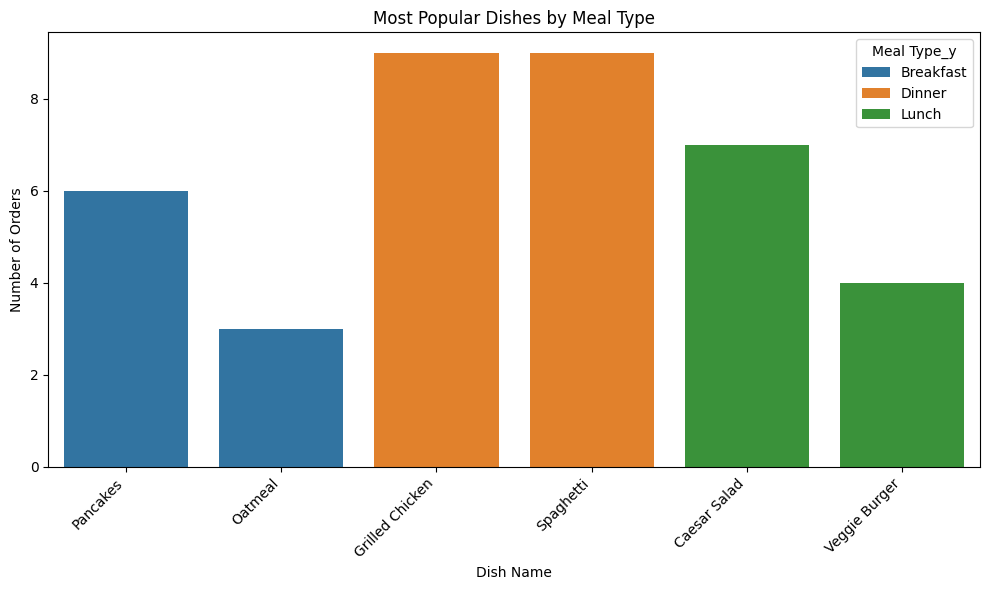

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dish Name_y', y='Order ID', hue='Meal Type_y', data=popular_dishes_by_meal)
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.title('Most Popular Dishes by Meal Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Orders')

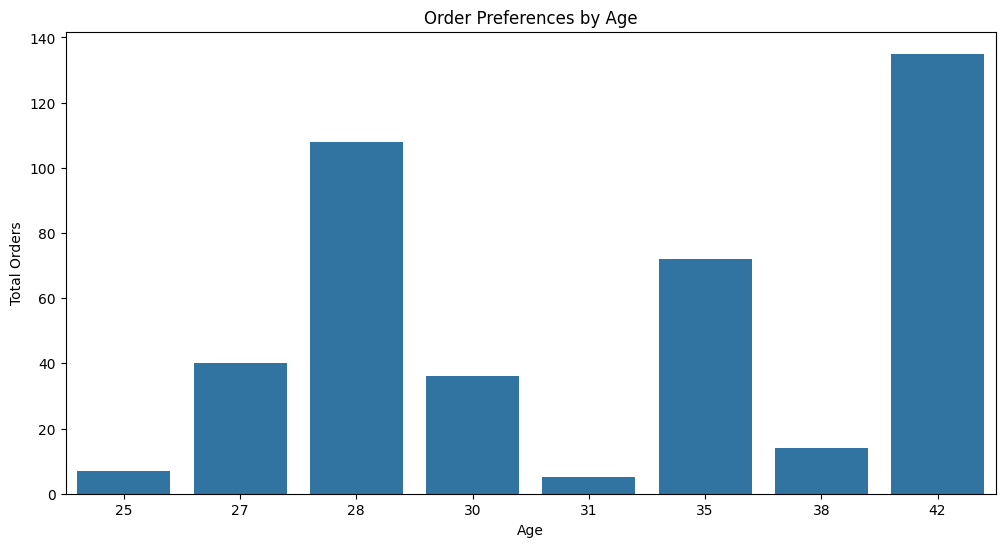

In [43]:
# Explore demographic factors and user behavior
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Total Orders', data=merged_df.groupby('User ID').agg({'Age': 'max', 'Total Orders': 'sum'}).reset_index())
plt.title('Order Preferences by Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')

Order Patterns by Time of Day:

Analyze the number of orders and revenue generated during different times of the day (e.g., Morning, Afternoon, Night).

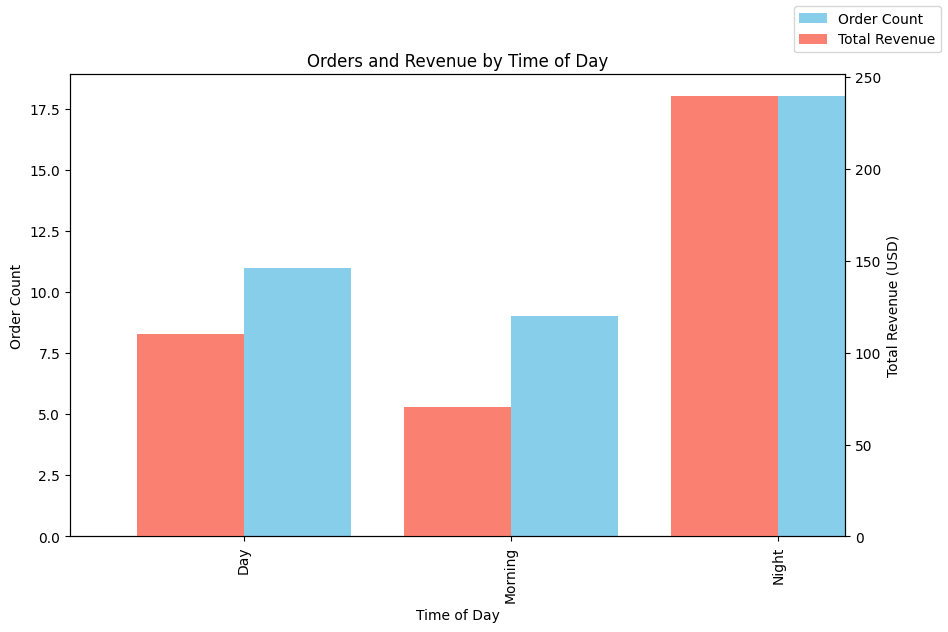

In [67]:
# Order Patterns by Time of Day
order_time_analysis = merged_df.groupby('Time of Day').agg({
    'Order ID': 'count',
    'Amount (USD)': 'sum'
}).rename(columns={'Order ID': 'Order Count', 'Amount (USD)': 'Total Revenue'})

# Bar plot for Orders and Revenue by Time of Day
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
order_time_analysis['Order Count'].plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Order Count')
order_time_analysis['Total Revenue'].plot(kind='bar', ax=ax2, color='salmon', position=1, width=0.4, label='Total Revenue')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Total Revenue (USD)')
fig.legend(loc='upper right')
plt.title('Orders and Revenue by Time of Day')
plt.xticks(rotation=45)
plt.show()

Analyze which types of dishes (e.g., fast prep vs. slow prep) have longer cooking sessions.

<ipython-input-66-eb3e8c7358af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Meal Type_x', y='Duration (mins)', palette='Set2')


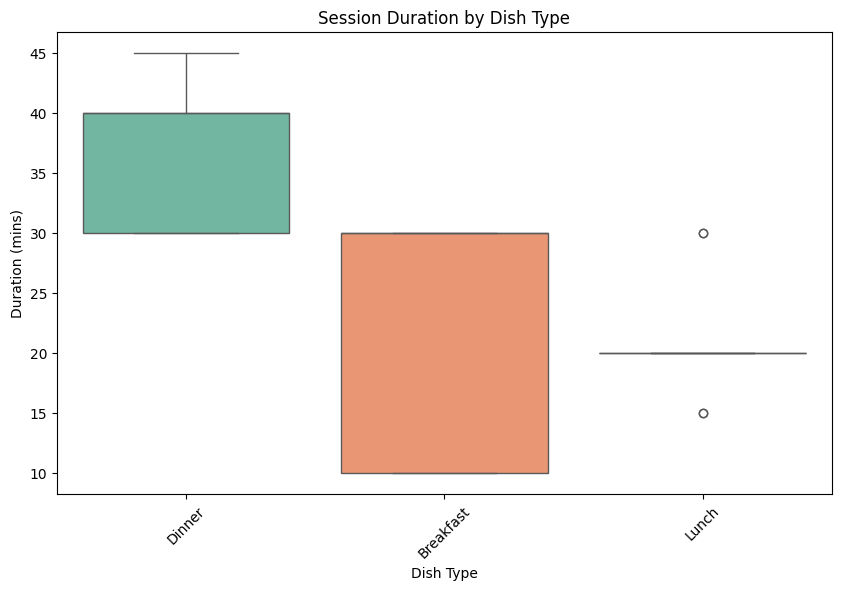

In [66]:
# Duration and Dish Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Meal Type_x', y='Duration (mins)', palette='Set2')
plt.title('Session Duration by Dish Type')
plt.xlabel('Dish Type')
plt.ylabel('Duration (mins)')
plt.xticks(rotation=45)
plt.show()